## Data storytelling

In [3]:
import pandas as pd

df_annual = pd.read_csv("../data/Data_Processing/co2_annmean_mlo.csv", skiprows=43)

df_annual.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [4]:
df_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    64 non-null     int64  
 1   mean    64 non-null     float64
 2   unc     64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


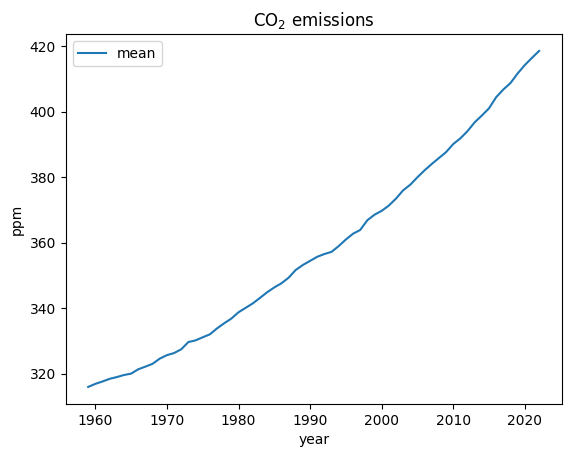

In [8]:
df_annual.plot(x = "year", y= "mean",  ylabel="ppm", title="CO$_2$ emissions"); ## Pandas plot

In [13]:
df_country = pd.read_html("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0)[0] ## Läser in från nätet sätter kolumn 0 till index
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 1 to 209
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      209 non-null    object 
 1   CO2 Emissions  (tons, 2016)  209 non-null    int64  
 2   1 Year  Change               209 non-null    object 
 3   Population  (2016)           209 non-null    int64  
 4   Per  capita                  209 non-null    float64
 5   Share  of world              209 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.4+ KB


In [17]:
df_country = df_country.rename({"Share  of world": "World percentage"}, axis=1) ## byter namn på share of world
df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18%
2,United States,5011686600,-2.01%,327210198,15.32,14.02%
3,India,2533638100,4.71%,1338636340,1.89,7.09%
4,Russia,1661899300,-2.13%,145109157,11.45,4.65%
5,Japan,1239592060,-1.21%,126993857,9.76,3.47%


In [21]:
df_country["World percentage"] = df_country["World percentage"].str[:-1].astype(float) ## Slicar (rendsar) bort värden (%)) :-2 blir 29.1 istället för 29.18. Typomvanldar till float
df_country.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18
2,United States,5011686600,-2.01%,327210198,15.32,14.02
3,India,2533638100,4.71%,1338636340,1.89,7.09
4,Russia,1661899300,-2.13%,145109157,11.45,4.65
5,Japan,1239592060,-1.21%,126993857,9.76,3.47


<Axes: xlabel='Country'>

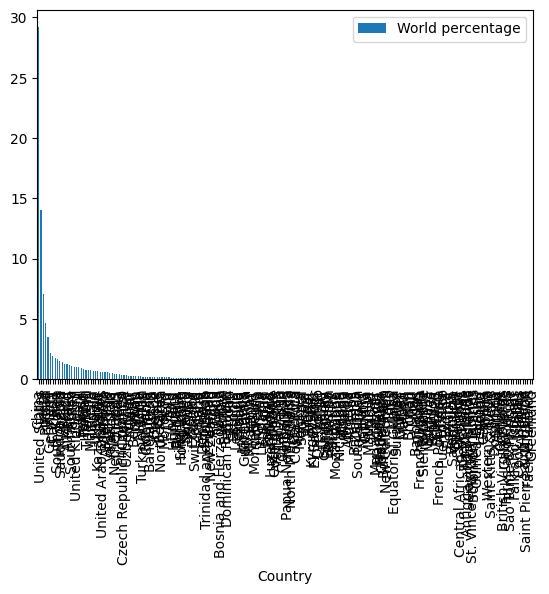

In [22]:
df_country.plot(kind="bar", x="Country", y="World percentage")

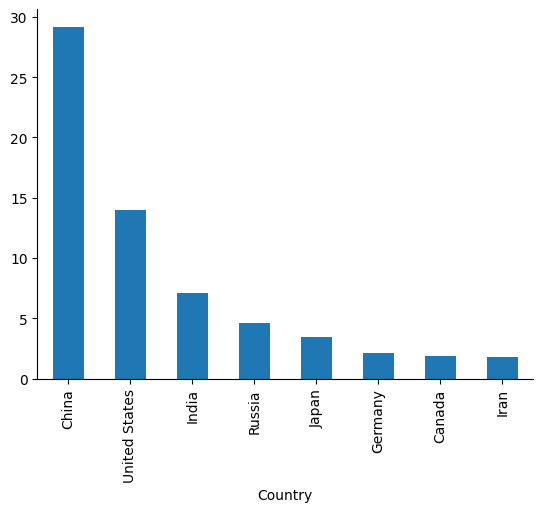

In [30]:
ax_percentage = df_country.head(8).plot(kind="bar", x="Country", y="World percentage") ## Tar endast med dom 8 högsta i plotten. tar bort clutter
ax_percentage. spines["top"].set_visible(False)# gömmer övre linjen
ax_percentage. spines["right"].set_visible(False)# gömmerhögra linjen
ax_percentage.legend().set_visible(False)# gömmer legend


## Remove clutter
- 

In [ ]:
df_country.head(10).plot(kind="bar", x="Country", y="World percentage")

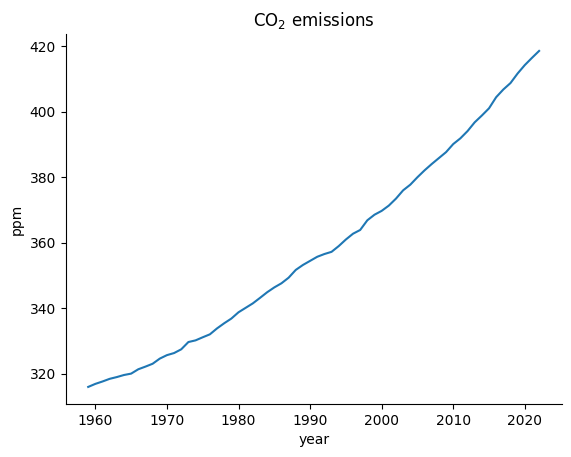

In [32]:
ax_annual = df_annual.plot(x = "year", y= "mean",  ylabel="ppm", title="CO$_2$ emissions"); ## alt + ctrl + nedåt så ändrar man de rader samtidigt
ax_annual. spines["top"].set_visible(False)# gömmer övre linjen
ax_annual. spines["right"].set_visible(False)# gömmer högra linjen
ax_annual.legend().set_visible(False)# gömmer legend

## Attention
- Markerar det som är intressant
- Riktar publiken mot det man vill
- Använd inte för mycket färger 
- Lek med tjocklek 

## Contrast
- Axis info -> låg kontrast
- Viktig infomation -> hög kontrast 


## Descriptive title and labels
- Beskriv ditt meddelande !


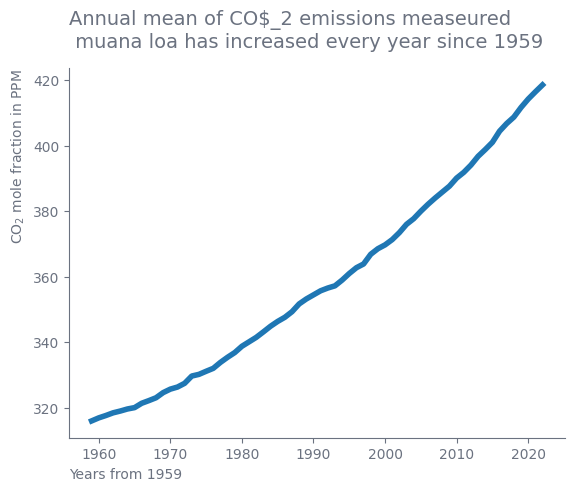

In [49]:
ax_annual = df_annual.plot(x= "year", y="mean", linewidth= 4) ## Linewidth ger tjockare linje
GRAY1 = "#6b7280"

ax_annual. spines["top"].set_visible(False)
ax_annual. spines["right"].set_visible(False)
ax_annual.legend().set_visible(False)
 
# Förbättra kontrast
ax_annual.spines["left"].set_color(GRAY1)
ax_annual.spines["bottom"].set_color(GRAY1)
ax_annual.tick_params(colors= GRAY1)

ax_annual.set_xlabel("Years from 1959", loc="left", color=GRAY1)
ax_annual.set_ylabel("CO$_2$ mole fraction in PPM", loc="top", color=GRAY1)
ax_annual.set_title("Annual mean of CO$_2 emissions measeured\n muana loa has increased every year since 1959", loc="left", pad=15, 
color= GRAY1, fontsize=14)

ax_annual;

['#be123c', '#be123c', '#be123c', '#4b5563', '#4b5563', '#4b5563', '#4b5563', '#4b5563']


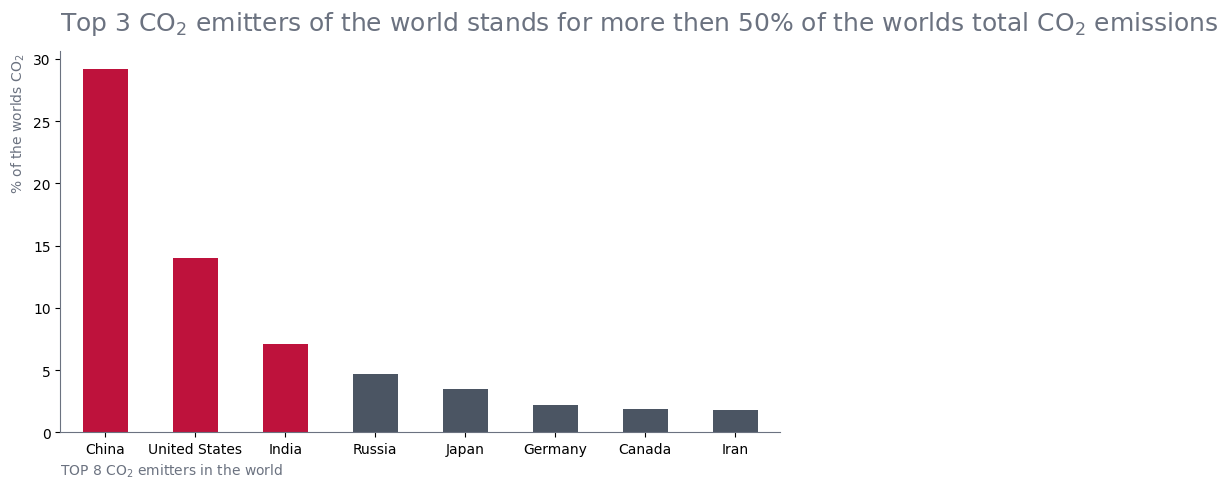

In [65]:
number_of_countries = 8
top_emitters = 3
red, gray = "#be123c", "#4b5563"
colors=[red]*top_emitters + [gray]*(number_of_countries-top_emitters) ## sätter röd färg på de 3 högsta i grafen

print(colors)

ax_country = df_country.head(number_of_countries).plot(kind="bar", y="World percentage", x="Country", color=colors, rot= 0)

ax_country.set_xlabel("TOP 8 CO$_2$ emitters in the world", loc="left", color=GRAY1)
ax_country.set_ylabel("% of the worlds CO$_2$ ", loc="top", color=GRAY1)


ax_country. spines["top"].set_visible(False)
ax_country. spines["right"].set_visible(False)
ax_country.legend().set_visible(False)
 
# Förbättra kontrast
ax_country.spines["left"].set_color(GRAY1)
ax_country.spines["bottom"].set_color(GRAY1)

ax_country.set_title("Top 3 CO$_2$ emitters of the world stands for more then 50% of the worlds total CO$_2$ emissions", loc= "left", pad= 15, color=GRAY1, fontsize= 18) 

fig= ax_country.get_figure() ## Sätter storlek på grafen
fig.set_size_inches(8,5)
fig.tight_layout()

In [1]:

n_groups = len(labels) # Calculate the number of groups based on the labels list.
n_subjects = len(subjects) # Determine the number of subjects from the subjects list.

# setup for bars
index = np.arange(n_groups) # X-positions for groups
bar_width = 0.2 # width for each bar

# Create a subplot
fig, ax = plt.subplots()

# Plot bars for each subject with specified width, position, color, and label.
for i, (subject, scores) in enumerate(subjects):
    plt.bar(index + i*bar_width, scores, bar_width, label=subject, color= colors[i])


plt.xlabel('Huvudmän', color= 'grey')
plt.ylabel('Poäng', color= 'grey')
plt.title('Totalpoäng för de olika ämnena för olika huvudmän')
plt.xticks(index + bar_width, labels)
plt.legend(fontsize=7, frameon=False)

ax.spines.right.set(visible=False)
ax.spines.top.set(visible=False)
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')

plt.tight_layout()
plt.show()

NameError: name 'labels' is not defined